# 3. Merging Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['font.size'] = 12
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [4]:
%config InlineBackend.figure_format = 'retina'

## Load in Penn World Tables

Let's start by loading in the Penn World Tables Data

In [31]:
pwt0 = pd.read_excel('data/pwt100.xlsx', sheet_name='Data')
pwt0 = pwt0[['year', 'countrycode', 'rgdpna', 'pop', 'hc', 'avh']].dropna()
pwt0.head()

,year,countrycode,rgdpna,pop,hc,avh
350,1950,ARG,196688.453125,17.091824,1.816503,2034.000000
351,1951,ARG,208305.203125,17.457578,1.830769,2037.866753
352,1952,ARG,195898.250000,17.815967,1.845147,2041.740856
353,1953,ARG,204164.875000,18.168618,1.859638,2045.622325
354,1954,ARG,210812.562500,18.517168,1.874243,2049.511172


## Load in World Bank inequality data

Now we load in a second dataset that we wish to merge with the PWT. Here we will use the World Bank data on global inequality, which has Gini coefficient data for a larget set of countries over many years.

In [15]:
gini = pd.read_excel('data/world_bank_gini.xls')
gini.head()

,countrycode,year,gini
0,AGO,2008,42.7
1,ALB,1996,27.0
2,ALB,2002,31.7
3,ALB,2005,30.6
4,ALB,2008,30.0


We can see that the World Bank data doesn't appear every year for many countries.

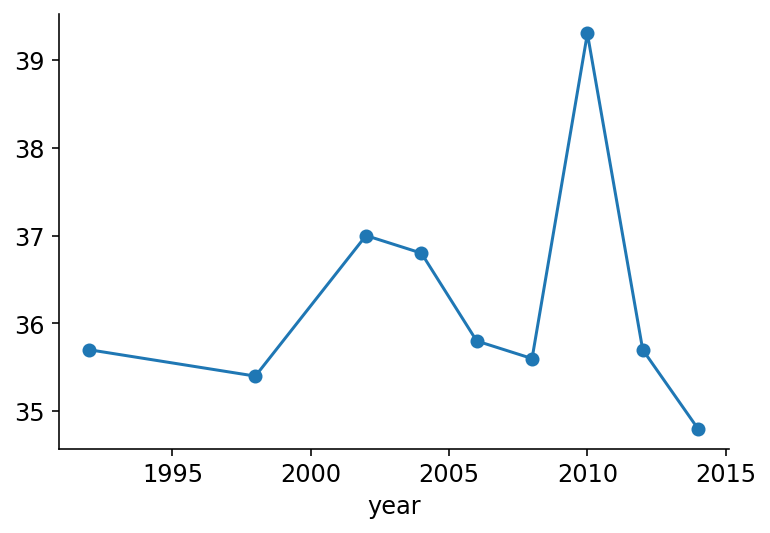

In [12]:
gini_pan = gini.pivot('year', 'countrycode')['gini']
gini_pan['VNM'].dropna().plot(marker='o');

## Merge the two together

Finally, we want to merge these two together. To do this, we will match any rows that have the same value for both `year` and `countrycode`.

In [32]:
full = pd.merge(pwt, gini, how='left', on=('year', 'countrycode'))
full.head()

,year,countrycode,rgdpna,pop,hc,avh,gini
0,1950,ARG,153269.500000,17.158029,1.816503,2034.000000,NaN
1,1951,ARG,162321.859375,17.525200,1.830769,2037.866753,NaN
2,1952,ARG,152653.734375,17.884976,1.845147,2041.740856,NaN
3,1953,ARG,159095.500000,18.238994,1.859638,2045.622325,NaN
4,1954,ARG,164275.734375,18.588894,1.874243,2049.511172,NaN


Now we can see how the Gini coefficient relates to other variables, like GDP per capita

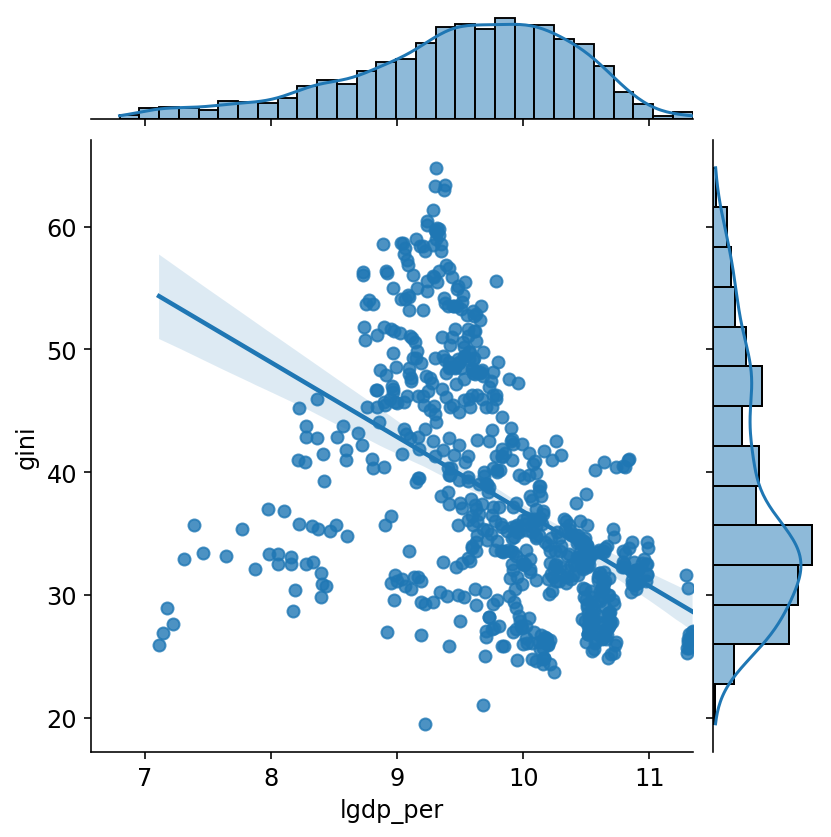

In [33]:
full['lgdp_per'] = np.log(full['rgdpna']/full['pop'])
sns.jointplot('lgdp_per', 'gini', kind='reg', data=full);